<a href="https://colab.research.google.com/github/rdorff/DeepLearning/blob/master/BasicClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install torch 
!pip3 install torchvision
!pip3 install tqdm

In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
from sklearn import metrics
 
#assert torch.cuda.is_available()

In [2]:
# Download data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_data=datasets.CIFAR10('../data', train=True, download=True, transform=transform)

test_data=datasets.CIFAR10('../data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
class ConvNetwork(nn.Module):
    '''
    Base Network Class
    '''
    def __init__(self):
      super(ConvNetwork, self).__init__()

      self.net = nn.Sequential(      
        nn.Conv2d(3, 6, 5), # 6x28x28
        nn.ReLU(),
        nn.MaxPool2d(2,2),  #6x14x14
        nn.Conv2d(6,20,9),  # 10x10x10
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(20 * 6 * 6, 100), 
        nn.ReLU(),
        nn.Linear(100,84), 
        nn.ReLU(),
        nn.Linear(84, 10)  
      )
      
    def forward(self, x):
      return self.net(x)



In [ ]:
class ResidualBlock(nn.Module):
  def __init__(self, in_channels, out_channels,stride=1):
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(in_channels, out_channels, stride=stride)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.relu = nn.ReLu()
    self.conv2 = nn.Conv2d(out_channels, out_channels,stride=stride)


  def forward(self, x):
    orig_x = x
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relux(x)
    x = self.conv2(x)
    x = self.bn1(x)

    if something:
        orig_x = seomthing
    x += orig_x
    return x
    



class ResNet(nn.Module):
  '''
  Resnet with 20 layers
  '''
  def __init__(self):

    self.conv1 = nn.Conv2d()
    self.bn1 = nn.BatchNorm2d()
    self.layer1 = 

In [4]:
# Intialize Data and Model
train_loader = DataLoader(train_data,shuffle=True,batch_size=36)
test_loader = DataLoader(test_data, batch_size=1)

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
model = ConvNetwork()

#model = model.cuda()
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_losses = []
train_accuracies = []

In [7]:
# Train on the Data

loop = tqdm(total=len(train_loader), position=0)
for epoch in range(1):
  print(epoch)
  # Train Data
  for batch, (x, y_truth) in enumerate(train_loader):
   # x, y_truth = x.cuda(async=True), y_truth.cuda(async=True)
    optimizer.zero_grad()

    y_hat = model(x)
    loss = objective(y_hat, y_truth)

    if batch % 100 == 0:
      train_losses.append(loss)
      accuracy = (y_hat.argmax(1) == y_truth).float().mean()
      train_accuracies.append(accuracy)
    
    loop.set_description('loss:{:.4f}'.format(loss.item()))
    loop.update(1)

    loss.backward()
    optimizer.step()

loop.close()


loss:2.1484:   0%|          | 6/1389 [00:00<00:36, 37.53it/s]

0


loss:1.6943: 100%|██████████| 1389/1389 [00:36<00:00, 38.26it/s]


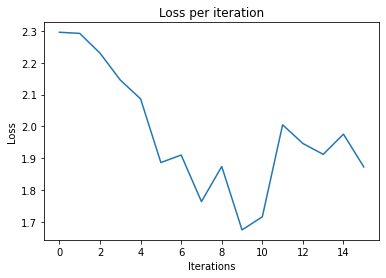

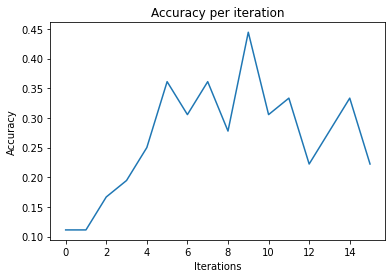

In [8]:
# Plot training loss and accuracy
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per iteration')
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy per iteration')
plt.show()

In [10]:
# Plot the confusion matrix
def plot_confusion(confusion_matrix, classes):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
  fig.colorbar(cax)

  plt.ylabel('Actual Category')
  plt.yticks(range(10), classes)
  plt.xlabel('Predicted Category')
  plt.xticks(range(10), classes)

  return fig



confusion_matrix = np.zeros([10,10], int)
p_label,a_label=[],[]
with torch.no_grad():
    for data in train_loader:
        images, labels = data
       # images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 
classes = ('airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks')


In [14]:
metrics.confusion_matrix(labels, predicted) 

array([[2, 0, 0, 1, 0, 0, 0, 0, 2, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 2, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 3],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
confusion_matrix

array([[2135,  751,  105,  452,   44,   48,   83,  267,  622,  493],
       [ 235, 2682,   22,  285,   35,   28,  165,  190,  425,  933],
       [ 488,  327,  447,  937,  614,  169, 1046,  722,   79,  171],
       [ 111,  210,  199, 1886,  382,  461,  950,  480,   53,  268],
       [ 261,  207,  226,  816, 1069,  160, 1244,  734,   80,  203],
       [  90,  128,  212, 1535,  365, 1079,  683,  670,   62,  176],
       [  40,  212,  102,  978,  450,  109, 2719,  206,   15,  169],
       [ 151,  217,  120,  747,  431,  282,  321, 2226,  102,  403],
       [ 939,  979,   38,  294,    7,   91,   42,  138, 1498,  974],
       [ 230, 1176,   31,  316,   20,   46,  228,  282,  406, 2265]])

In [ ]:
metrics.plot_confusion_matrix(labels, predicted) 

In [12]:
predicted

tensor([9, 9, 3, 1, 0, 1, 9, 7, 8, 1, 0, 3, 0, 7, 8, 6, 1, 3, 4, 3, 2, 3, 3, 3,
        5, 7, 2, 0, 9, 5, 8, 9])

In [13]:
labels

tensor([7, 8, 3, 1, 0, 2, 8, 6, 0, 8, 9, 3, 0, 4, 8, 6, 1, 5, 2, 3, 2, 2, 7, 0,
        7, 4, 2, 5, 8, 2, 0, 1])

In [ ]:
ta

In [17]:
for (x,y) in train_data:
  print(model(x),y)

RuntimeError: ignored

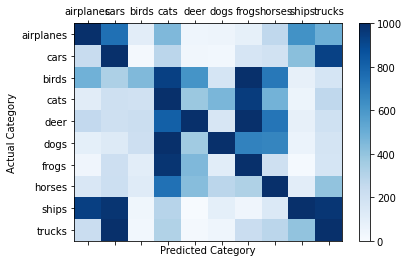

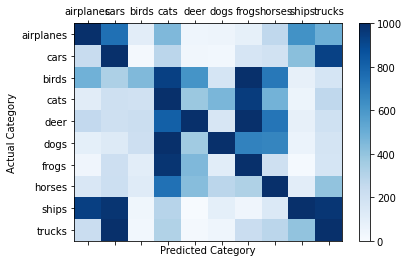

In [15]:
plot_confusion(confusion_matrix,classes)